In [86]:
import pandas as pd
import seaborn as sns
import numpy as np

import os, sys
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline

# Robobee analysis

In [39]:
# load all csv files from analyses
path = "data_robobee/"
dirs = os.listdir(path)

# sort it to have 
dirs.sort()
print(dirs)

['2011-08-31_13-38-25_ra.csv', '2011-08-31_13-38-25_rd.csv', '2011-08-31_13-38-25_wa.csv', '2011-08-31_13-38-25_wd.csv', '2011-09-03_16-39-39_ra.csv', '2011-09-03_16-39-39_rd.csv', '2011-09-03_16-39-39_wa.csv', '2011-09-03_16-39-39_wd.csv', '2011-09-06_13-58-27_ra.csv', '2011-09-06_13-58-27_rd.csv', '2011-09-06_13-58-27_wa.csv', '2011-09-06_13-58-27_wd.csv', '2011-09-10_14-04-09_1_ra.csv', '2011-09-10_14-04-09_1_rd.csv', '2011-09-10_14-04-09_1_wa.csv', '2011-09-10_14-04-09_1_wd.csv', '2011-09-10_14-04-09_2_ra.csv', '2011-09-10_14-04-09_2_rd.csv', '2011-09-10_14-04-09_2_wa.csv', '2011-09-10_14-04-09_2_wd.csv']


In [40]:
# sort the data into lists
wd_list = [file for file in dirs if file.endswith("wd.csv")]
rd_list = [file for file in dirs if file.endswith("rd.csv")]
wa_list = [file for file in dirs if file.endswith("wa.csv")]
ra_list = [file for file in dirs if file.endswith("ra.csv")]

In [46]:
# load dataframes 
wd_df_list = [pd.read_csv(path+filename, header=None) for filename in wd_list]
rd_df_list = [pd.read_csv(path+filename, header=None) for filename in rd_list]
wa_df_list = [pd.read_csv(path+filename, header=None) for filename in wa_list]
ra_df_list = [pd.read_csv(path+filename, header=None) for filename in ra_list]

In [54]:
# concatenate the dataframes per individual
distances_df = [pd.concat([wd_df_list[i],rd_df_list[i]], axis=1) for i in range(len(wd_df_list))]
angles_df = [pd.concat([wa_df_list[i],ra_df_list[i]], axis=1) for i in range(len(wa_df_list))]

In [74]:
# df.values to calculate matrix from data frame

In [93]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a, axis=0), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [94]:
def plot_mean_and_CI(mean, lb, ub, color_mean=None, color_shading=None):
    # plot the shaded range of the confidence intervals
    plt.fill_between(range(mean.shape[0]), ub, lb,
                     color=color_shading, alpha=.5)
    # plot the mean on top
    plt.plot(mean, color_mean)

## 1) Head Body Distance

In [81]:
# mean per individual
mean_distances = np.array([np.mean(distances_df[i], axis=0) for i in range(len(distances_df))])

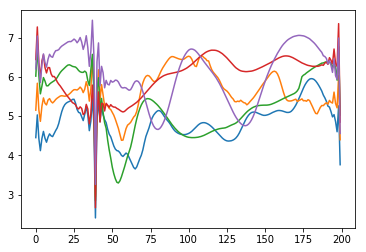

In [82]:
# mean curves per individual
for dist in mean_distances:
    sns.lineplot([i for i in range(200)], dist)

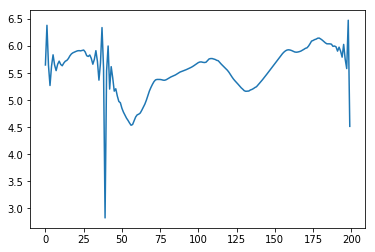

In [83]:
# mean over all individuals
mean_mean = np.mean(mean_distances, axis=0)
sns.lineplot([i for i in range(200)], mean_mean)

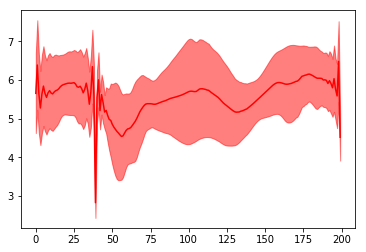

In [101]:
# plot the confidence interval over all individuals means
mean, ub, lb = mean_confidence_interval(mean_distances)
plot_mean_and_CI(mean, ub, lb, color_mean="red", color_shading="red")

## 2) Body Angle

In [102]:
# mean per individual
mean_angles = [np.mean(angles_df[i], axis=0) for i in range(len(angles_df))]

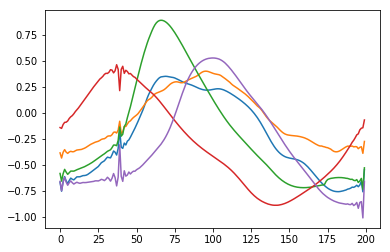

In [103]:
# mean curves per individual
for angle in mean_angles:
    sns.lineplot([i for i in range(200)], angle)

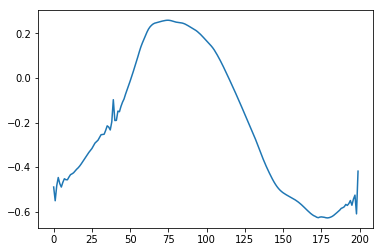

In [104]:
# mean over all individuals
mean_mean_angle = np.mean(mean_angles, axis=0)
sns.lineplot([i for i in range(200)], mean_mean_angle)

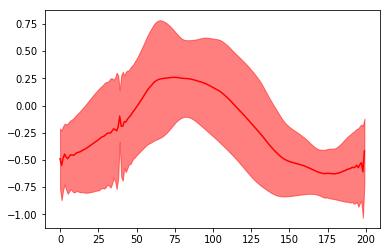

In [105]:
# plot the confidence interval over all individuals means
mean, ub, lb = mean_confidence_interval(mean_angles)
plot_mean_and_CI(mean, ub, lb, color_mean="red", color_shading="red")